In [ ]:
# Instalação das bibliotecas necessárias
!pip install yfinance matplotlib

Digite o código da ação (Ex: PETR4.SA, AAPL, AMZN): ITSA4.SA
Baixando dados para ITSA4.SA...


[*********************100%***********************]  1 of 1 completed


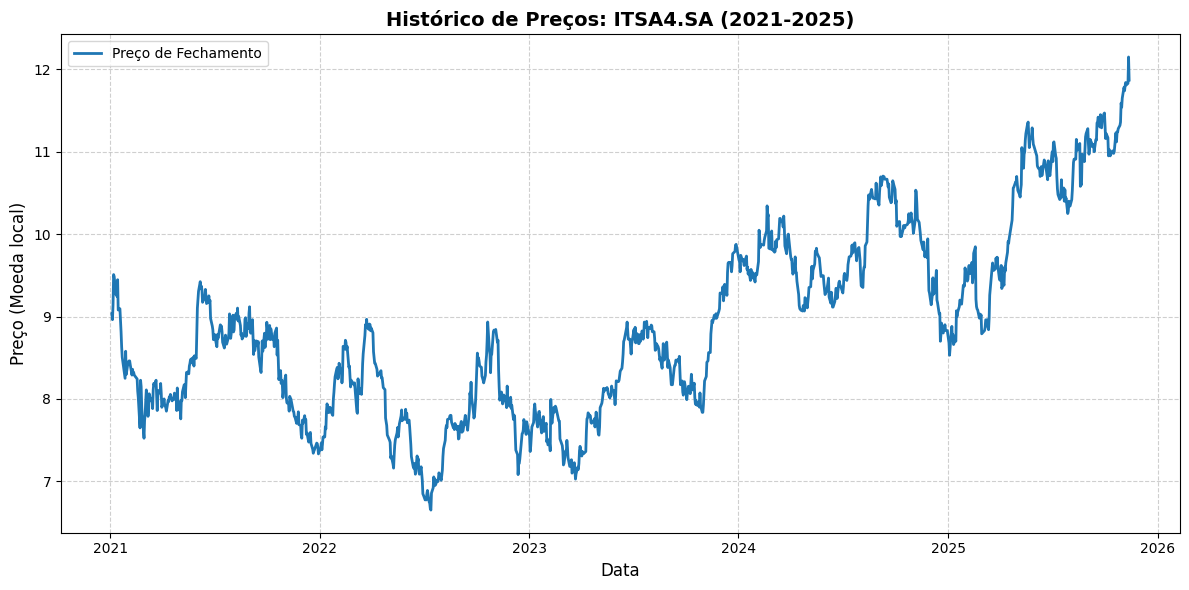

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Solicitando o input do usuário
ticker = input("Digite o código da ação (Ex: PETR4.SA, AAPL, AMZN): ")

# Baixando os dados
print(f"Baixando dados para {ticker}...")
data = yf.download(ticker, start="2021-01-01", end="2025-11-13", auto_adjust=False)

if data.empty:
    print("⚠️ Símbolo inválido ou dados não encontrados!")
else:
    # Configuração do Gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(data["Close"], label="Preço de Fechamento", linewidth=2, color="#1f77b4")

    plt.title(f"Histórico de Preços: {ticker.upper()} (2021-2025)", fontsize=14, fontweight='bold')
    plt.xlabel("Data", fontsize=12)
    plt.ylabel("Preço (Moeda local)", fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()

Gerando análise técnica avançada para ITSA4.SA...


[*********************100%***********************]  1 of 1 completed


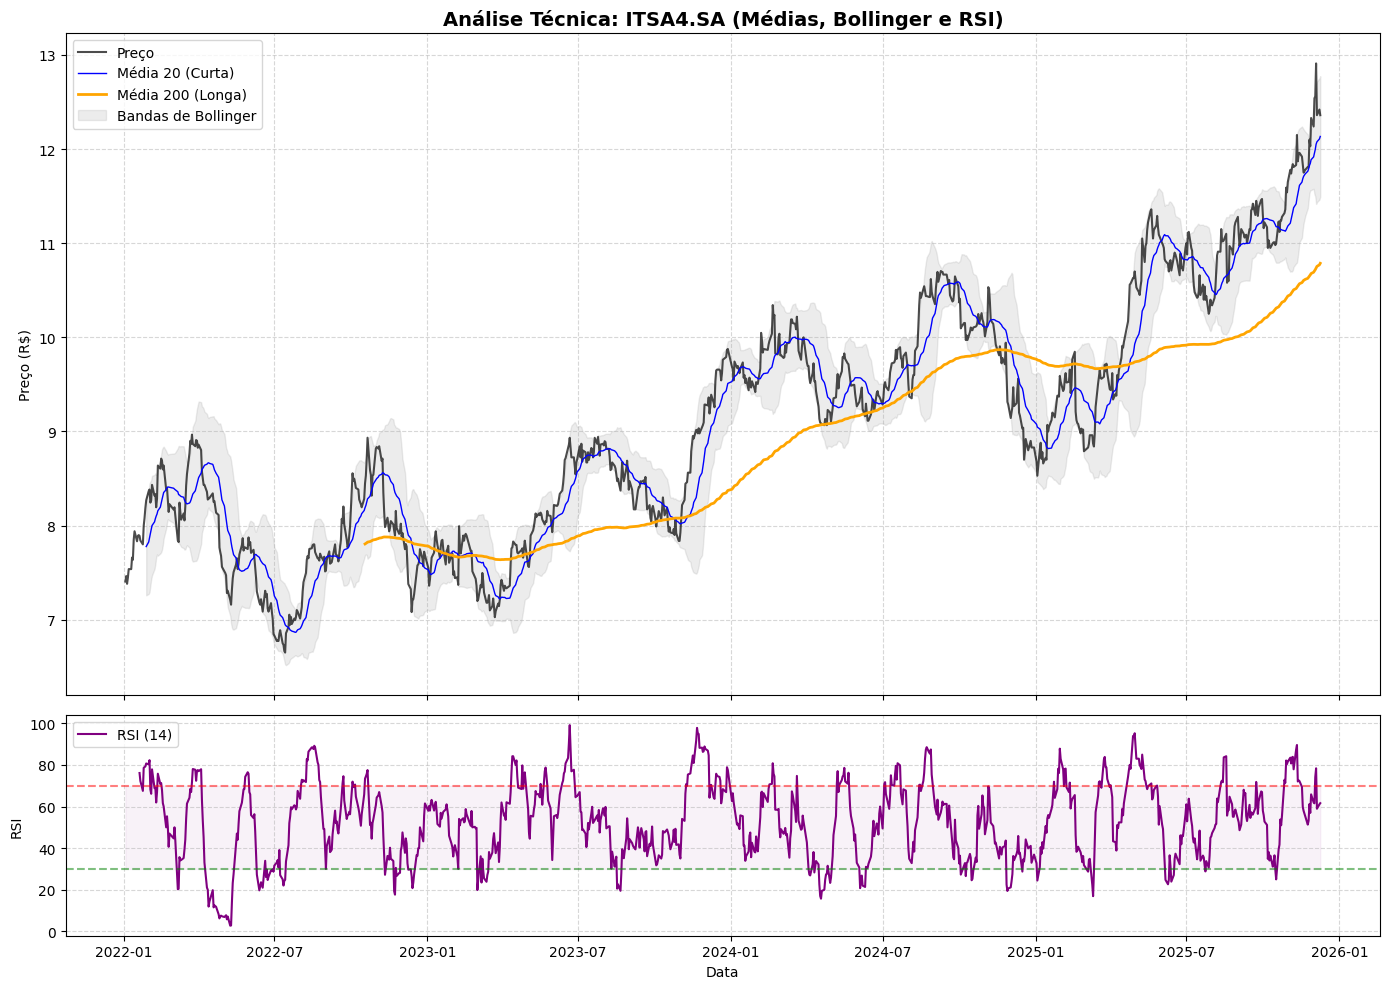

In [ ]:
# --- CÉLULA 2: ANÁLISE AVANÇADA (CORRIGIDO) ---
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd # Importando pandas para corrigir o erro
import numpy as np

# Definindo o ativo
ticker = "ITSA4.SA"

print(f"Gerando análise técnica avançada para {ticker}...")

# 1. Baixando dados
data = yf.download(ticker, start="2022-01-01", end="2025-12-31", auto_adjust=False)

if data.empty:
    print("Erro: Dados não encontrados.")
else:
    # --- CORREÇÃO DO ERRO AQUI ---
    # Se os dados vierem com "cabeçalho duplo" (MultiIndex), removemos o nível do ticker
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    # -----------------------------

    # 2. Calculando Indicadores
    # Médias Móveis
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()

    # Bandas de Bollinger
    desvio = data['Close'].rolling(window=20).std()

    # Agora a conta vai funcionar porque garantimos que é uma coluna simples
    data['Bollinger_Upper'] = data['SMA_20'] + (2 * desvio)
    data['Bollinger_Lower'] = data['SMA_20'] - (2 * desvio)

    # RSI (IFR)
    delta = data['Close'].diff()
    ganho = delta.where(delta > 0, 0)
    perda = -delta.where(delta < 0, 0)
    media_ganho = ganho.rolling(window=14).mean()
    media_perda = perda.rolling(window=14).mean()
    rs = media_ganho / media_perda
    data['RSI'] = 100 - (100 / (1 + rs))

    # 3. Plotando
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Gráfico Principal
    ax1.set_title(f'Análise Técnica: {ticker} (Médias, Bollinger e RSI)', fontsize=14, fontweight='bold')
    ax1.plot(data.index, data['Close'], label='Preço', color='black', alpha=0.7)
    ax1.plot(data.index, data['SMA_20'], label='Média 20 (Curta)', color='blue', linewidth=1)
    ax1.plot(data.index, data['SMA_200'], label='Média 200 (Longa)', color='orange', linewidth=2)

    # Preenchimento das Bandas
    ax1.fill_between(data.index, data['Bollinger_Lower'], data['Bollinger_Upper'], color='gray', alpha=0.15, label='Bandas de Bollinger')

    ax1.legend(loc='upper left')
    ax1.grid(True, linestyle='--', alpha=0.5)
    ax1.set_ylabel('Preço (R$)')

    # Gráfico Secundário (RSI)
    ax2.plot(data.index, data['RSI'], color='purple', label='RSI (14)')
    ax2.axhline(70, color='red', linestyle='--', alpha=0.5) # Sobrecompra
    ax2.axhline(30, color='green', linestyle='--', alpha=0.5) # Sobrevenda
    ax2.fill_between(data.index, 70, 30, color='purple', alpha=0.05)

    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Data')
    ax2.legend(loc='upper left')
    ax2.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

Baixando dados do Benchmark (^BVSP)...


[*********************100%***********************]  1 of 1 completed



--- RESUMO DO PERÍODO ---
Retorno ITSA4.SA: 66.88%
Retorno IBOVESPA: 52.02%
✅ O ativo superou o índice em 14.87 p.p.


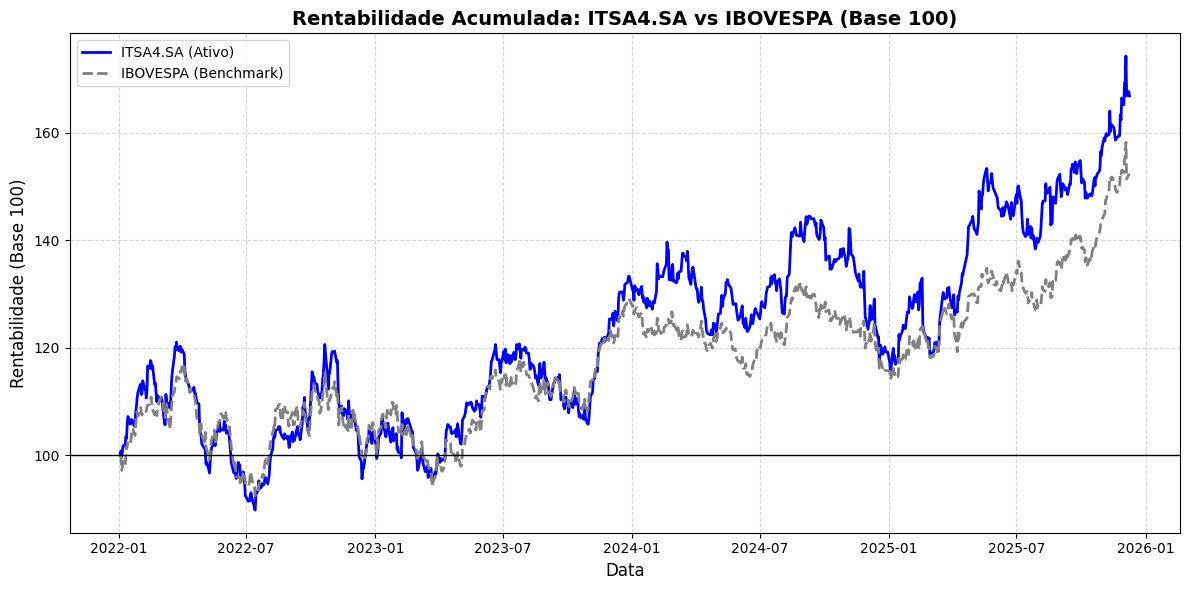

In [ ]:
# --- CÉLULA 3: COMPARATIVO DE RENTABILIDADE (BENCHMARK) ---
# Ticker de referência (Ibovespa)
benchmark_ticker = "^BVSP"

print(f"Baixando dados do Benchmark ({benchmark_ticker})...")
benchmark = yf.download(benchmark_ticker, start="2022-01-01", end="2025-12-31", auto_adjust=False)

# Tratamento para garantir que não dê erro de índice
if isinstance(benchmark.columns, pd.MultiIndex):
    benchmark.columns = benchmark.columns.get_level_values(0)

# Garantindo que temos dados nas duas pontas para as mesmas datas
# Juntamos os fechamentos em um único DataFrame
df_compare = pd.DataFrame()
df_compare['Ativo'] = data['Close'] # Pega do passo anterior
df_compare['Ibovespa'] = benchmark['Close']

# Removemos dias que não tem dados em algum dos dois (feriados locais vs globais)
df_compare.dropna(inplace=True)

# --- NORMALIZAÇÃO (Base 100) ---
# Divide todos os preços pelo preço do primeiro dia e multiplica por 100
# Isso faz ambos começarem em 100, mostrando a % de ganho/perda real
df_normalizado = (df_compare / df_compare.iloc[0]) * 100

# Plotagem
plt.figure(figsize=(12, 6))
plt.title(f'Rentabilidade Acumulada: {ticker} vs IBOVESPA (Base 100)', fontsize=14, fontweight='bold')

plt.plot(df_normalizado.index, df_normalizado['Ativo'], label=f'{ticker} (Ativo)', color='blue', linewidth=2)
plt.plot(df_normalizado.index, df_normalizado['Ibovespa'], label='IBOVESPA (Benchmark)', color='gray', linestyle='--', linewidth=2)

# Adicionando uma linha de referência no 100 (0% de retorno)
plt.axhline(100, color='black', linewidth=1, linestyle='-')

plt.ylabel('Rentabilidade (Base 100)', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Calculando o retorno final para mostrar no print
retorno_ativo = df_normalizado['Ativo'].iloc[-1] - 100
retorno_ibov = df_normalizado['Ibovespa'].iloc[-1] - 100

print(f"\n--- RESUMO DO PERÍODO ---")
print(f"Retorno {ticker}: {retorno_ativo:.2f}%")
print(f"Retorno IBOVESPA: {retorno_ibov:.2f}%")

if retorno_ativo > retorno_ibov:
    print(f"✅ O ativo superou o índice em {retorno_ativo - retorno_ibov:.2f} p.p.")
else:
    print(f"🔻 O ativo performou abaixo do índice.")

plt.show()